<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** María Fernanda Amador Alvarez, Xareny Gonzalez Lopez.

**Fecha:** 23 de noviembre del 2021.

**Expediente** : 725573, 720811.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/feramdor/Tarea8_Amador_Gonzalez

# Tarea 8: Clase 22

## Enunciado de tarea 
> Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y además deben de compararlo con los resultados teóricos del método de valuación de Black-Scholes (ecuación del principio)

In [1]:
# Librerías
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import yfinance as yf
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

#### Código de solución `Estudiante 1: Fernanda Amador`

In [2]:
# Funciones
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

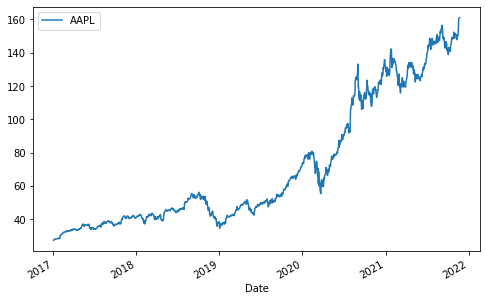

In [3]:
# Obtenemos precios al cierre
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

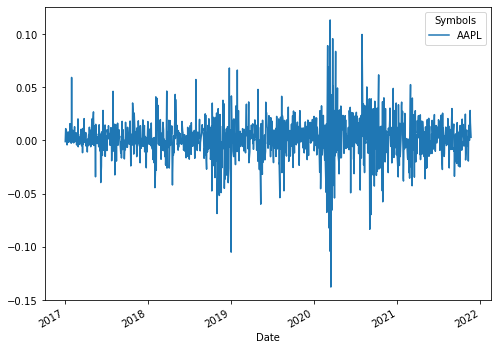

In [4]:
# Obtenemos los rendimientos 
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

In [5]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,AAPL
Date,
2017-01-04,-0.001
2017-01-05,0.005
2017-01-06,0.011
2017-01-09,0.009
2017-01-10,0.001
...,...
2021-11-16,0.007
2021-11-17,0.016
2021-11-18,0.029


In [6]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = '2022-09-16'

nscen = 10000
dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
                '2021-11-26', '2021-11-29', '2021-11-30', '2021-12-01',
                '2021-12-02', '2021-12-03',
                ...
                '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
                '2022-09-09', '2022-09-12', '2022-09-13', '2022-09-14',
                '2022-09-15', '2022-09-16'],
               dtype='datetime64[ns]', length=215, freq='B'),
 215)

In [7]:
ri = calc_daily_ret(closes_aapl)

# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]


# Simulación del rendimiento 
dt = 1
Z = np.random.randn(ndays,nscen) 

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R * dt + Z * sigma_r * np.sqrt(dt),
                     index = dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*np.exp(sim_ret_ri.cumsum())

In [8]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0014406606310824563, 0.019205765620409095)

In [9]:
# Tasa de bonos de 1 yr de fecha 19/11/2021 -> 0.18%
r = 0.00018/360 # Tasa diaria

In [10]:
today = pd.to_datetime(date.today())
expiry = '2022-09-16'

dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')

ndays = len(dates)
nscen = 10
dates

DatetimeIndex(['2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2021-11-29', '2021-11-30', '2021-12-01',
               '2021-12-02', '2021-12-03',
               ...
               '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
               '2022-09-09', '2022-09-12', '2022-09-13', '2022-09-14',
               '2022-09-15', '2022-09-16'],
              dtype='datetime64[ns]', length=215, freq='B')

In [11]:
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r, 
                       index = dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-11-22,-0.029,-7.026e-05,-0.047,...,0.015,-0.004,-0.002
2021-11-23,-0.004,8.378e-03,-0.028,...,0.013,0.006,-0.013
2021-11-24,-0.017,-1.938e-02,-0.047,...,0.011,0.030,0.009
2021-11-25,-0.044,-2.830e-02,-0.058,...,0.002,0.027,0.035
2021-11-26,-0.070,-8.066e-03,-0.060,...,-0.021,0.027,0.005
...,...,...,...,...,...,...,...
2022-09-12,-0.521,-3.963e-01,-0.011,...,0.079,-0.228,-0.076
2022-09-13,-0.525,-3.889e-01,0.017,...,0.086,-0.211,-0.053
2022-09-14,-0.551,-3.648e-01,0.013,...,0.080,-0.209,-0.064
2022-09-15,-0.575,-3.827e-01,-0.013,...,0.100,-0.208,-0.028


In [12]:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2021-11-22,156.357,161.009,153.618,...,163.503,160.305,160.672
2021-11-23,160.370,162.375,156.554,...,163.104,162.031,158.954
2021-11-24,158.271,157.930,153.668,...,162.766,166.004,162.404
2021-11-25,154.112,156.527,151.923,...,161.359,165.380,166.758
2021-11-26,150.063,159.726,151.579,...,157.669,165.372,161.859
...,...,...,...,...,...,...,...
2022-09-12,95.591,108.336,159.226,...,174.199,128.197,149.270
2022-09-13,95.285,109.141,163.812,...,175.523,130.409,152.783
2022-09-14,92.813,111.797,163.167,...,174.344,130.709,151.047
2022-09-15,90.644,109.815,158.901,...,177.892,130.759,156.522


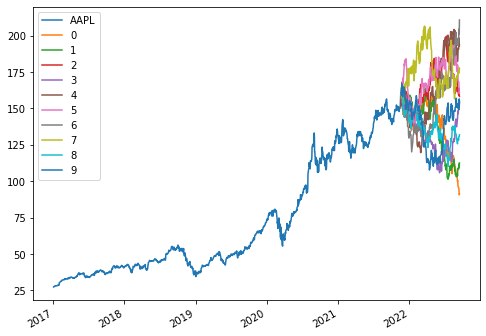

In [13]:
# Precios simulados con los precios descargados
pd.concat([closes_aapl,sim_closes]).plot(figsize = (8,6));

In [14]:
from datetime import date
Hoy = date.today()
expiry = '2022-09-16'
K = 160 # strike price
nscen = 100000
dates = pd.date_range(start= Hoy, 
                      periods = ndays)
ndays = len(dates)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

# simular rendimientos
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r,
                       index = dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())

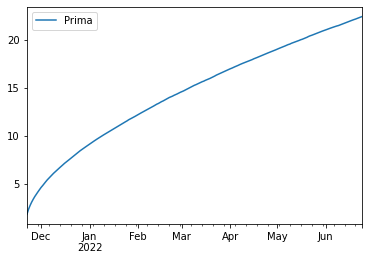

In [15]:
# Valor del call 
strike = 160
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(sim_closes-strike, 0).mean(axis=1)}, 
                    index = dates)
call.plot();

In [16]:
call.iloc[-1]

Prima    22.413
Name: 2022-06-24 00:00:00, dtype: float64

In [17]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc = mean_est, scale = sigma_est)
i2 = st.norm.interval(confianza, loc = mean_est, scale=sigma_est)
print(i1)
print(i2)

(22.115118752078335, 22.71113132058151)
(22.115122359076544, 22.711127713583302)


### Utilizando BlackScholes

In [18]:
# Datos para usar en la fórmula (anualizados)
vol = ret_aapl['AAPL'].std()*np.sqrt(252)
media = ret_aapl['AAPL'].mean()*252
maduracion = ndays
st = closes_aapl.iloc[-1,0]
rf = r*360
print('Volatilidad anual',vol)
print('Tiempo de maduración',maduracion,'días')
print('Spot price',st)
print('Strike Price',K)
print('Tasa Libre de riesgo',r*360*100)

Volatilidad anual 0.3048820774211796
Tiempo de maduración 215 días
Spot price 161.02000427246094
Strike Price 160
Tasa Libre de riesgo 0.018000000000000002


In [19]:
#Black Scholes
from scipy.stats import norm
d1 = (np.log(st/K)+(rf+(vol**2)/2))/vol
d2 = d1-vol
put = K*np.exp(-rf)*norm.cdf(-d2)-st*norm.cdf(-d1)
print('El valor de la opción con Black Scholes es:',put,'y el valor de la opción simulado es de:',call.iloc[-1].values)


El valor de la opción con Black Scholes es: 18.9258244557559 y el valor de la opción simulado es de: [22.41312504]


> Podemos ver la que la diferencia entre el modelo de BlackScholes y el valor que nos da en la simulación nos da unos valores un poco alejados, considero que esto se debe a las librerías que dejaron de servir para Python; los resultados ya no son tan acercados. 

#### Código de solución `Estudiante 2: Xareny Gonzalez`

In [20]:
# Código de solución estudiante 2
.
.
.
.


SyntaxError: invalid syntax (<ipython-input-20-17323e7c54a4>, line 2)